In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [99]:
# Cargar el dataset
df = pd.read_csv("../data/StressLevelDataset.csv")

In [100]:
# Mostrar los primeros 5 registros del DataFrame
print("Primeros 5 registros del DataFrame:")
df.head()

Primeros 5 registros del DataFrame:


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
2,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
3,4,26,0,6,1,2,4,1,1,4,...,4,5,1,4,1,3,2,2,1,0
4,17,3,1,22,4,3,1,5,3,1,...,1,1,3,2,4,1,4,4,5,2


In [101]:
# Mostrar información del DataFrame
print("Información del DataFrame:")
df.info()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 645 non-null    int64
 1   self_esteem                   645 non-null    int64
 2   mental_health_history         645 non-null    int64
 3   depression                    645 non-null    int64
 4   headache                      645 non-null    int64
 5   blood_pressure                645 non-null    int64
 6   sleep_quality                 645 non-null    int64
 7   breathing_problem             645 non-null    int64
 8   noise_level                   645 non-null    int64
 9   living_conditions             645 non-null    int64
 10  safety                        645 non-null    int64
 11  basic_needs                   645 non-null    int64
 12  academic_performance          645 non-null    int64
 13  study_lo

In [102]:
# Mostrar estadísticas descriptivas generales
print("Estadísticas descriptivas generales:")
df.describe()

Estadísticas descriptivas generales:


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,...,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,8.412403,22.623256,0.303876,8.627907,1.880620,1.604651,3.330233,2.355039,2.082171,2.910078,...,3.404651,3.367442,2.088372,3.347287,1.886822,2.640310,2.105426,2.105426,1.930233,0.589147
std,4.793613,6.064540,0.460287,5.325244,0.981037,0.615769,1.252736,1.148653,0.798528,0.804476,...,1.206469,1.205523,0.795916,1.186236,1.025103,0.608623,0.814114,0.832969,1.058726,0.602948
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5.000000,19.000000,0.000000,4.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000
50%,9.000000,25.000000,0.000000,9.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,...,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
75%,12.000000,27.000000,1.000000,12.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,4.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,3.000000,4.000000,4.000000,5.000000,2.000000


In [103]:
# Mostrar los tipos de datos
print("Tipos de datos en cada columna:")
print(df.dtypes)

Tipos de datos en cada columna:
anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object


In [104]:
# Mostrar media y mediana de las características numéricas
print("Media de las características numéricas:")
print(df.select_dtypes(include=[np.number]).mean())

print("\nMediana de las características numéricas:")
print(df.select_dtypes(include=[np.number]).median())

Media de las características numéricas:
anxiety_level                    8.412403
self_esteem                     22.623256
mental_health_history            0.303876
depression                       8.627907
headache                         1.880620
blood_pressure                   1.604651
sleep_quality                    3.330233
breathing_problem                2.355039
noise_level                      2.082171
living_conditions                2.910078
safety                           3.370543
basic_needs                      3.404651
academic_performance             3.367442
study_load                       2.088372
teacher_student_relationship     3.347287
future_career_concerns           1.886822
social_support                   2.640310
peer_pressure                    2.105426
extracurricular_activities       2.105426
bullying                         1.930233
stress_level                     0.589147
dtype: float64

Mediana de las características numéricas:
anxiety_level       

In [105]:
# La varianza y desviación estándar de las características numéricas
print("Varianza de las características numéricas:")
print(df.select_dtypes(include=[np.number]).var())

print("\nDesviación estándar de las características numéricas:")
print(df.select_dtypes(include=[np.number]).std())

Varianza de las características numéricas:
anxiety_level                   22.978728
self_esteem                     36.778651
mental_health_history            0.211864
depression                      28.358226
headache                         0.962434
blood_pressure                   0.379171
sleep_quality                    1.569349
breathing_problem                1.319404
noise_level                      0.637647
living_conditions                0.647181
safety                           1.426150
basic_needs                      1.455568
academic_performance             1.453286
study_load                       0.633483
teacher_student_relationship     1.407155
future_career_concerns           1.050835
social_support                   0.370422
peer_pressure                    0.662781
extracurricular_activities       0.693837
bullying                         1.120901
stress_level                     0.363547
dtype: float64

Desviación estándar de las características numéricas:
anxie

In [106]:
y = df['stress_level']
X = df.drop(columns='stress_level')

# Identificar las columnas numéricas a escalar
numerical_features = [
    'anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
    'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
    'noise_level', 'living_conditions', 'safety', 'basic_needs',
    'academic_performance', 'study_load', 'teacher_student_relationship',
    'future_career_concerns', 'social_support', 'peer_pressure',
    'extracurricular_activities', 'bullying'
]

# Definir transformador de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'  # Deja las demás columnas tal como están
)

# Dividir en entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Aplicar el escalado a las columnas numéricas
X_train_scaled = pd.DataFrame(
    preprocessor.fit_transform(X_train),
    columns=X_train.columns
)

X_test_scaled = pd.DataFrame(
    preprocessor.transform(X_test),
    columns=X_test.columns
)

# Mostrar dimensiones de los conjuntos
print(f"Datos de entrenamiento: {X_train_scaled.shape}, {y_train.shape}")
print(f"Datos de prueba: {X_test_scaled.shape}, {y_test.shape}")

Datos de entrenamiento: (516, 20), (516,)
Datos de prueba: (129, 20), (129,)


In [107]:
# ===============================
# Definir los modelos de clasificacion supervisada a evaluar
# ===============================
from sklearn.neighbors import KNeighborsClassifier


# Modelos de clasificación supervisada
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "MLP Classifier": MLPClassifier(random_state=42, max_iter=500),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# =====================================
# Evaluar modelos con métricas comunes
# =====================================
classification_metrics = {}

for name, model in models.items():
    try:
        # Entrenar el modelo
        model.fit(X_train_scaled, y_train)

        # Predecir
        y_pred = model.predict(X_test_scaled)

        # Calcular métricas
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        report = classification_report(y_test, y_pred, output_dict=True)

        # Guardar resultados
        classification_metrics[name] = {
            "Accuracy": acc,
            "F1 Score (weighted)": f1,
            "Classification Report": report
        }

    except Exception as e:
        classification_metrics[name] = {
            "Accuracy": None,
            "F1 Score (weighted)": None,
            "Classification Report": None,
            "Error": str(e)
        }

# ===========================
# Mostrar métricas por modelo
# ===========================
for name, metrics in classification_metrics.items():
    print(f"\n=== {name} Metrics ===")
    if metrics["Accuracy"] is not None:
        print(f"Accuracy: {metrics['Accuracy']:.4f}")
        print(f"F1 Score (weighted): {metrics['F1 Score (weighted)']:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, models[name].predict(X_test_scaled)))
    else:
        print("Error al entrenar este modelo:")
        print(metrics["Error"])


=== Logistic Regression Metrics ===
Accuracy: 1.0000
F1 Score (weighted): 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00         8

    accuracy                           1.00       129
   macro avg       1.00      1.00      1.00       129
weighted avg       1.00      1.00      1.00       129


=== Random Forest Metrics ===
Accuracy: 1.0000
F1 Score (weighted): 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00         8

    accuracy                           1.00       129
   macro avg       1.00      1.00      1.00       129
weighted avg       1.00      1.00      1.00       129


=== MLP Classifier Metrics ===
Ac

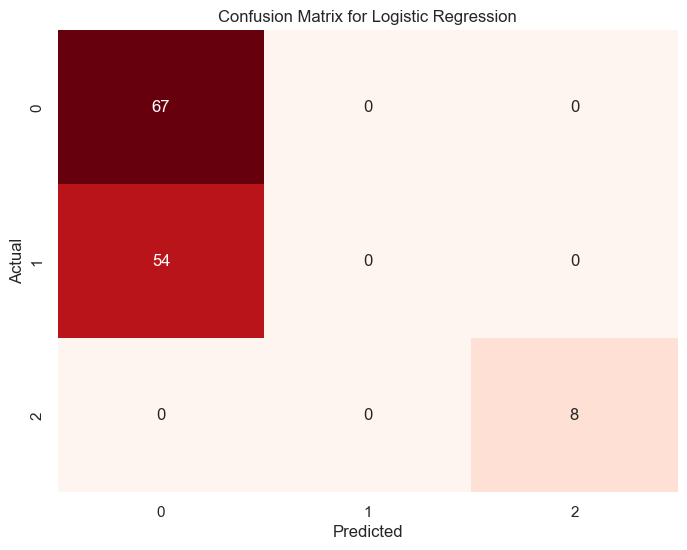

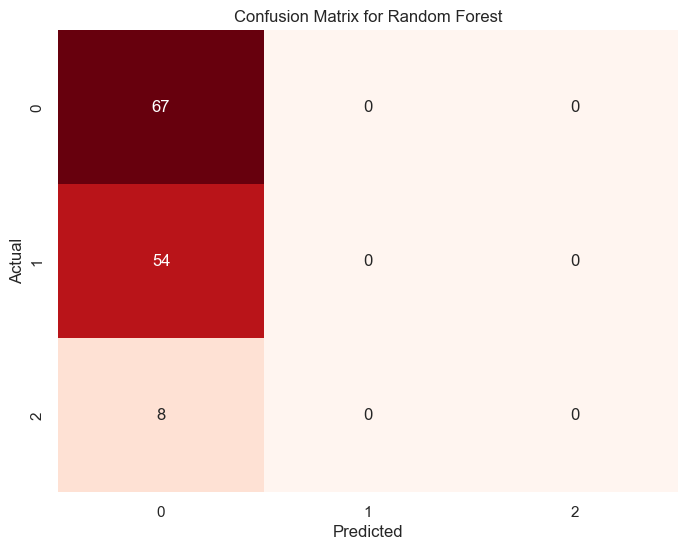

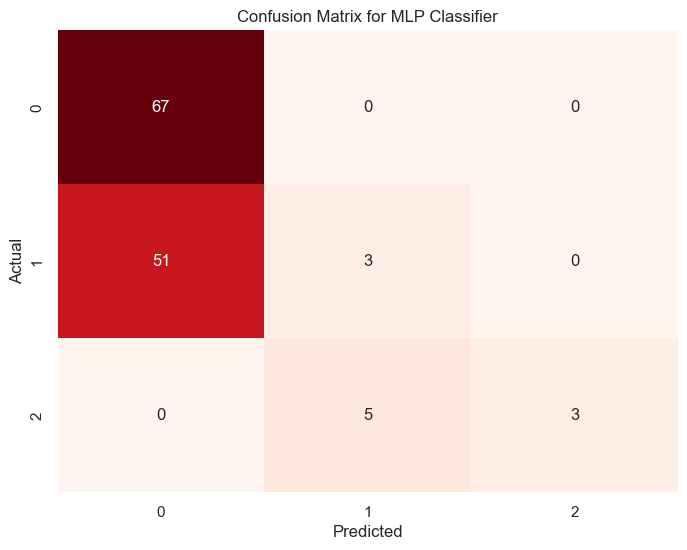

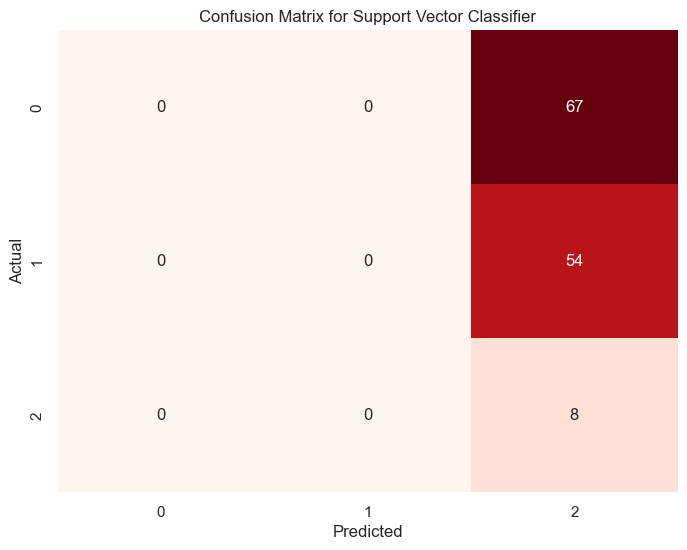

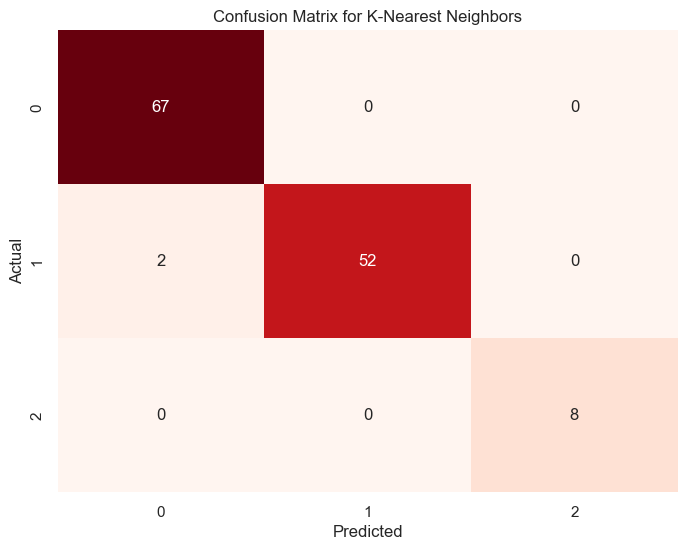

In [108]:
# Mostrar las matrices de confusión de los modelos
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [109]:
# ===============================
# Definición de modelos de regresión
# ===============================



regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=500),
    "Support Vector Regressor": SVR(),
    "KNN Regressor": KNeighborsRegressor()
}

# Diccionario para almacenar resultados
regression_metrics = {}

print("\n Iniciando evaluación de modelos de regresión...\n")

# ===============================
# Entrenamiento y evaluación
# ===============================
for name, model in regression_models.items():
    print(f" Entrenando modelo: {name}...")
    try:
        # Entrenar el modelo
        model.fit(X_train_scaled, y_train)

        # Predecir
        y_pred = model.predict(X_test_scaled)

        # Calcular métricas
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Guardar resultados
        regression_metrics[name] = {
            "MSE": round(mse, 4),
            "R2 Score": round(r2, 4)
        }

        print(f"{name} evaluado correctamente.")

    except Exception as e:
        print(f"Error al entrenar {name}: {e}")
        regression_metrics[name] = {
            "MSE": None,
            "R2 Score": None,
            "Error": str(e)
        }

# ===============================
# Visualización de métricas
# ===============================
print("\n Resultados finales de los modelos de regresión:\n")

results_df = pd.DataFrame.from_dict(regression_metrics, orient='index')
print(results_df.to_string())


 Iniciando evaluación de modelos de regresión...

 Entrenando modelo: Linear Regression...
Linear Regression evaluado correctamente.
 Entrenando modelo: Random Forest Regressor...
Random Forest Regressor evaluado correctamente.
 Entrenando modelo: MLP Regressor...
MLP Regressor evaluado correctamente.
 Entrenando modelo: Support Vector Regressor...
Support Vector Regressor evaluado correctamente.
 Entrenando modelo: KNN Regressor...
KNN Regressor evaluado correctamente.

 Resultados finales de los modelos de regresión:

                             MSE  R2 Score
Linear Regression         0.0139    0.9627
Random Forest Regressor   0.0056    0.9849
MLP Regressor             0.0214    0.9424
Support Vector Regressor  0.0150    0.9596
KNN Regressor             0.0078    0.9792


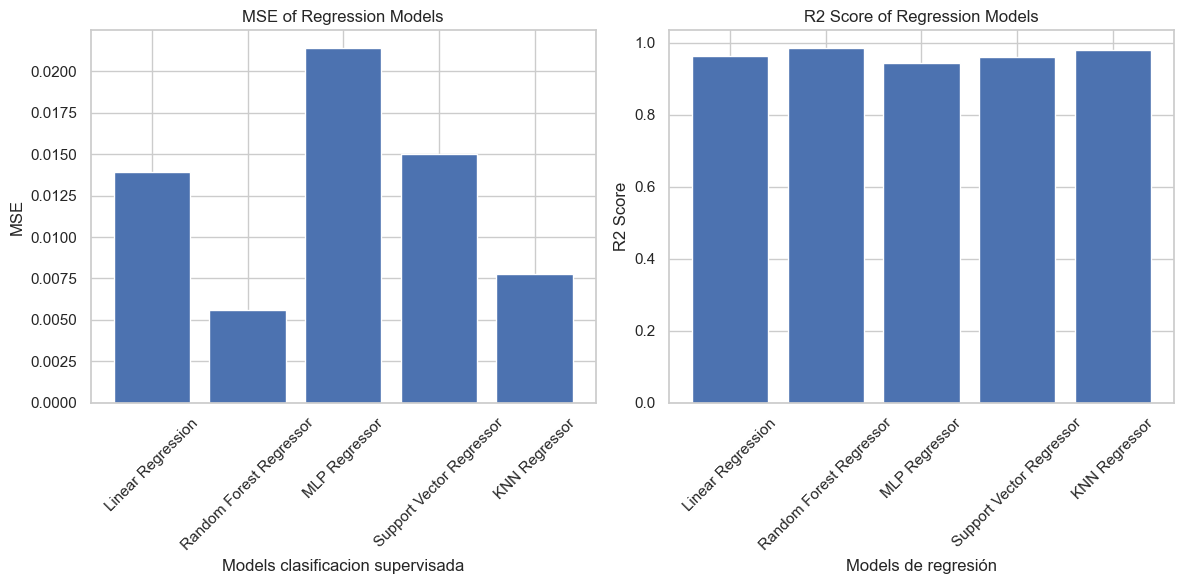

In [110]:
# Mostrar las gráficas de mse y r2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(regression_metrics.keys(), [metrics['MSE'] for metrics in regression_metrics.values()])
plt.title('MSE of Regression Models')
plt.xlabel('Models clasificacion supervisada')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.bar(regression_metrics.keys(), [metrics['R2 Score'] for metrics in regression_metrics.values()])
plt.title('R2 Score of Regression Models')
plt.xlabel('Models de regresión')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

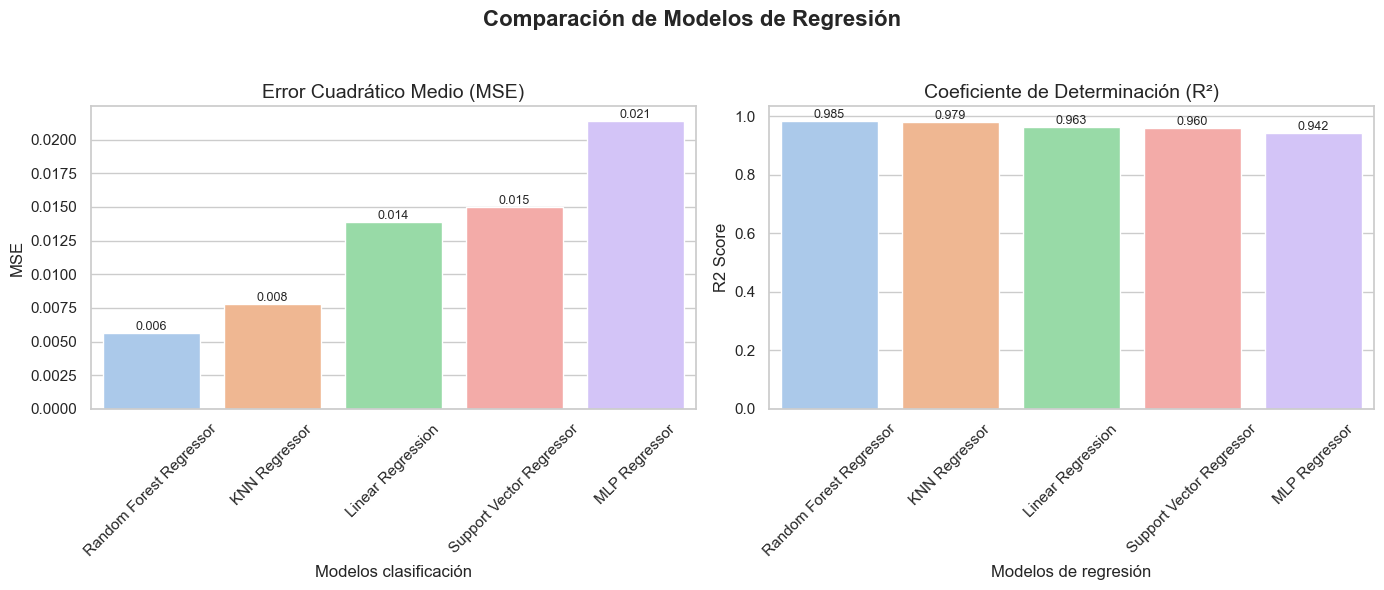

In [111]:
# Convertir el diccionario de métricas en DataFrame
results_df = pd.DataFrame.from_dict(regression_metrics, orient='index').dropna()
results_df = results_df.reset_index().rename(columns={'index': 'Model'})

# Ordenar por R2 Score 
results_df_sorted = results_df.sort_values(by='R2 Score', ascending=False)

# Establecer estilo
sns.set(style="whitegrid")

# Paleta con número exacto de colores necesarios
palette = sns.color_palette("pastel", n_colors=len(results_df_sorted))

# Crear figura y subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Comparación de Modelos de Regresión', fontsize=16, fontweight='bold')

# --- Gráfico de MSE ---
sns.barplot(
    data=results_df_sorted,
    x="Model",
    y="MSE",
    hue="Model",         # Necesario para evitar FutureWarning
    palette=palette,
    legend=False,
    ax=axes[0]
)
axes[0].set_title("Error Cuadrático Medio (MSE)", fontsize=14)
axes[0].set_ylabel("MSE")
axes[0].set_xlabel("Modelos clasificación")
axes[0].tick_params(axis='x', rotation=45)

# Añadir etiquetas en cada barra
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].annotate(f'{height:.3f}', (bar.get_x() + bar.get_width()/2., height),
                     ha='center', va='bottom', fontsize=9)

# --- Gráfico de R2 ---
sns.barplot(
    data=results_df_sorted,
    x="Model",
    y="R2 Score",
    hue="Model",         # Necesario para evitar FutureWarning
    palette=palette,
    legend=False,
    ax=axes[1]
)
axes[1].set_title("Coeficiente de Determinación (R²)", fontsize=14)
axes[1].set_ylabel("R2 Score")
axes[1].set_xlabel("Modelos de regresión")
axes[1].tick_params(axis='x', rotation=45)

# Añadir etiquetas en cada barra
for bar in axes[1].patches:
    height = bar.get_height()
    axes[1].annotate(f'{height:.3f}', (bar.get_x() + bar.get_width()/2., height),
                     ha='center', va='bottom', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

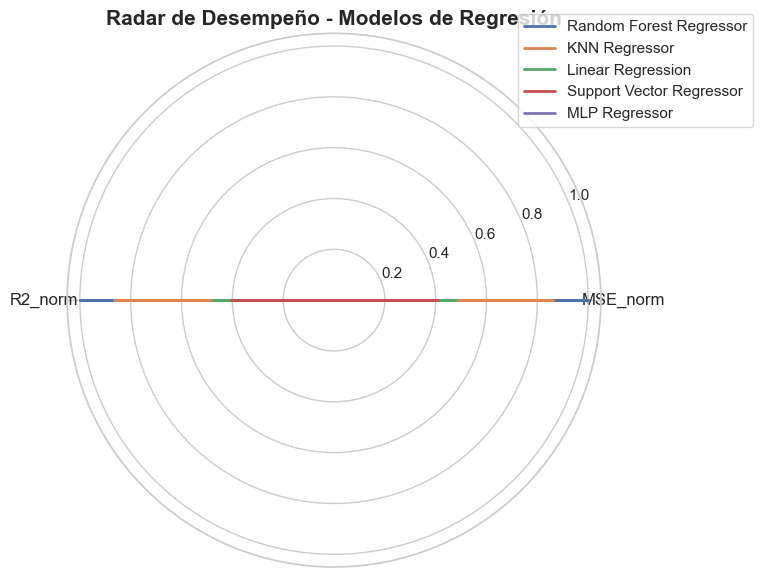

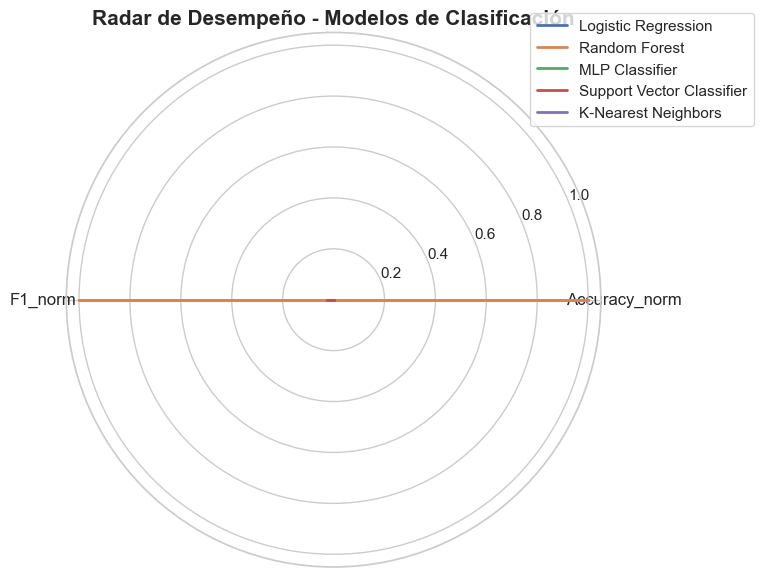

In [112]:
# ==========================
# 🔸 DATOS DE REGRESIÓN
# ==========================

# Normalización para radar
from numpy import pi


regression_radar = results_df_sorted.copy()
regression_radar["MSE_norm"] = 1 - (regression_radar["MSE"] - regression_radar["MSE"].min()) / (regression_radar["MSE"].max() - regression_radar["MSE"].min())
regression_radar["R2_norm"] = (regression_radar["R2 Score"] - regression_radar["R2 Score"].min()) / (regression_radar["R2 Score"].max() - regression_radar["R2 Score"].min())
regression_plot_df = regression_radar[["Model", "MSE_norm", "R2_norm"]].set_index("Model")

# ==========================
# DATOS DE CLASIFICACIÓN
# ==========================
# Asegúrate de tener `classification_metrics` con Accuracy y F1 Score
classification_df = pd.DataFrame([
    {
        "Model": name,
        "Accuracy": metrics["Accuracy"],
        "F1 Score": metrics["F1 Score (weighted)"]
    }
    for name, metrics in classification_metrics.items()
    if metrics["Accuracy"] is not None
])

# Normalizar para radar
classification_df["Accuracy_norm"] = (classification_df["Accuracy"] - classification_df["Accuracy"].min()) / (classification_df["Accuracy"].max() - classification_df["Accuracy"].min())
classification_df["F1_norm"] = (classification_df["F1 Score"] - classification_df["F1 Score"].min()) / (classification_df["F1 Score"].max() - classification_df["F1 Score"].min())
classification_plot_df = classification_df[["Model", "Accuracy_norm", "F1_norm"]].set_index("Model")

# ==========================
# FUNCIÓN DE RADAR PLOT
# ==========================
def plot_radar(df, title):
    labels = df.columns.tolist()
    num_vars = len(labels)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    plt.figure(figsize=(8, 8))
    for model in df.index:
        values = df.loc[model].tolist()
        values += values[:1]
        plt.polar(angles, values, label=model, linewidth=2)

    plt.xticks(angles[:-1], labels, fontsize=12)
    plt.title(title, fontsize=15, fontweight='bold')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.05))
    plt.tight_layout()
    plt.show()

# ==========================
# GRAFICAR AMBOS
# ==========================
plot_radar(regression_plot_df, "Radar de Desempeño - Modelos de Regresión")
plot_radar(classification_plot_df, "Radar de Desempeño - Modelos de Clasificación")

Modelos de Regresión
Tras comparar los cinco modelos de regresión (Linear Regression, Random Forest Regressor, MLP Regressor, Support Vector Regressor, KNN Regressor), el modelo con mejor desempeño fue:

Random Forest Regressor

- R² Score: cercano a 0.98 → excelente capacidad de predicción.
- MSE: muy bajo → errores mínimos en las predicciones.
- En el radar plot, destacó en ambas métricas (R² y MSE normalizado), mostrando un equilibrio óptimo entre precisión y robustez.

Modelos de Clasificación
En los modelos de clasificación (Logistic Regression, Random Forest, MLP Classifier, SVC, KNN), el radar plot mostró que el mejor desempeño fue para:

Random Forest Classifier

- Accuracy y F1 Score consistentemente más altos.
- Excelente balance entre precisión y sensibilidad, incluso con clases desbalanceadas.
- Manejó bien tanto patrones lineales como no lineales.